 # Analysis of US Age-Adjusted Death Rate and Life Expectancy Over Time

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from config import plotly_key

import plotly
plotly.tools.set_credentials_file(username='eyangeric', api_key=plotly_key)
plotly.tools.set_config_file(world_readable=True, sharing='public')

In [2]:
#####read in datasets####

#dataset of death rate causes
Death_Rate_Causes = pd.read_csv("Datasets/NCHS_-_Leading_Causes_of_Death__United_States.csv")

#dataset of overall US death rates and life expectancies
Overall_DR_LE = pd.read_csv ("Datasets/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv")

#dataset with the US State specific geolocations
US_States_GeoLocations = pd.read_csv("Datasets/US_States_GeoLocations.csv")

#dataset with US divisional mortality data
divisiondf = pd.read_csv("Datasets/United States and Puerto Rico Cancer Statistics, 1999-2015 Mortality (District).csv")

#dataset with US regional mortality data
regiondf = pd.read_csv("Datasets/United States and Puerto Rico Cancer Statistics, 1999-2015 Mortality (Region).csv")

In [3]:
#preview datasets
print(Death_Rate_Causes.head())
print("-----------------------------------------------------------------------------------------------------------------")
print(Overall_DR_LE.head())

   Year                                     113 Cause Name  \
0  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
1  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
2  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
3  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
4  2016  Accidents (unintentional injuries) (V01-X59,Y8...   

               Cause Name       State  Deaths  Age-adjusted Death Rate  
0  Unintentional injuries     Alabama    2755                     55.5  
1  Unintentional injuries      Alaska     439                     63.1  
2  Unintentional injuries     Arizona    4010                     54.2  
3  Unintentional injuries    Arkansas    1604                     51.8  
4  Unintentional injuries  California   13213                     32.0  
-----------------------------------------------------------------------------------------------------------------
   Year       Race         Sex  Average Life Expectancy (Years)  \
0  2015 

## Create plots for US age-adjusted death rates and life expectancies by gender over time

In [4]:
#filter out values that do not include all races
all_races = Overall_DR_LE['Race']== "All Races"

#create new data frame with values for all races
Overall_DR_LE_AllRaces = Overall_DR_LE[all_races]
Overall_DR_LE_AllRaces.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


In [5]:
#groupby gender
both = Overall_DR_LE_AllRaces.loc[Overall_DR_LE_AllRaces['Sex'] == 'Both Sexes', :]
female = Overall_DR_LE_AllRaces.loc[Overall_DR_LE_AllRaces['Sex'] == 'Female', :]
male = Overall_DR_LE_AllRaces.loc[Overall_DR_LE_AllRaces['Sex'] == 'Male', :]

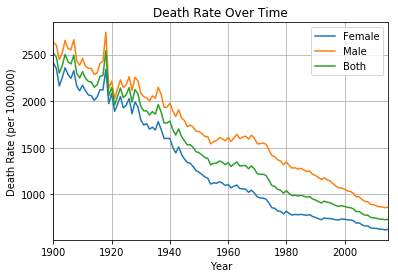

In [6]:
#create graph showing death rate trends by gender over time
plt.plot(female['Year'],female['Age-adjusted Death Rate'], label='Female')
plt.plot(male['Year'], male['Age-adjusted Death Rate'], label='Male')
plt.plot(both['Year'],both['Age-adjusted Death Rate'], label='Both')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Death Rate (per 100,000)")
plt.title('Death Rate Over Time')
plt.xlim(1900,2015)
plt.grid()
plt.savefig("death_rate.png")
plt.show()

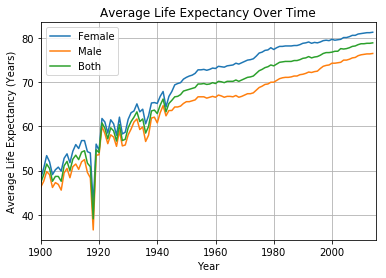

In [7]:
#create graph showing avg. life expectancy trends by gender over time
plt.plot(female['Year'],female['Average Life Expectancy (Years)'], label='Female')
plt.plot(male['Year'],male['Average Life Expectancy (Years)'], label='Male')
plt.plot(both['Year'],both['Average Life Expectancy (Years)'], label='Both')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy (Years)")
plt.title('Average Life Expectancy Over Time')
plt.xlim(1900,2015)
plt.grid()
plt.savefig("life_exp.png")
plt.show()

## Create plots for age-adjusted death rates of specific causes of death

In [8]:
#unique places under the "State" column
print("Unique States")
print(Death_Rate_Causes["State"].unique())
print("-----------------------------------------------------------------------------------------------------------------")
print("Unique Causes of Death")
print(Death_Rate_Causes["Cause Name"].unique())

Unique States
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'United States']
-----------------------------------------------------------------------------------------------------------------
Unique Causes of Death
['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Cancer'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia'
 'Kidney disease' 'Stroke' 'Suicide']


In [9]:
#Remove values "All causes" of death and "United States" from dataset
Cause_of_Death_Clean=Death_Rate_Causes.loc[(Death_Rate_Causes["Cause Name"]!="All causes") & 
                                           (Death_Rate_Causes["State"]=="United States")]

In [10]:
#create separate datasets for each specific cause of death
Deaths_Alzheimer = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Alzheimer's disease",:]
Deaths_CLRD = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "CLRD",:]
Deaths_Cancer = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Cancer",:]
Deaths_Diabetes = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Diabetes",:]
Deaths_HD = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Heart disease",:]
Deaths_IP = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Influenza and pneumonia",:]
Deaths_Kidney = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Kidney disease",:]
Deaths_Stroke = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Stroke",:]
Deaths_Suicide = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Suicide",:]
Deaths_UI = Cause_of_Death_Clean.loc[Cause_of_Death_Clean["Cause Name"] == "Unintentional injuries",:]

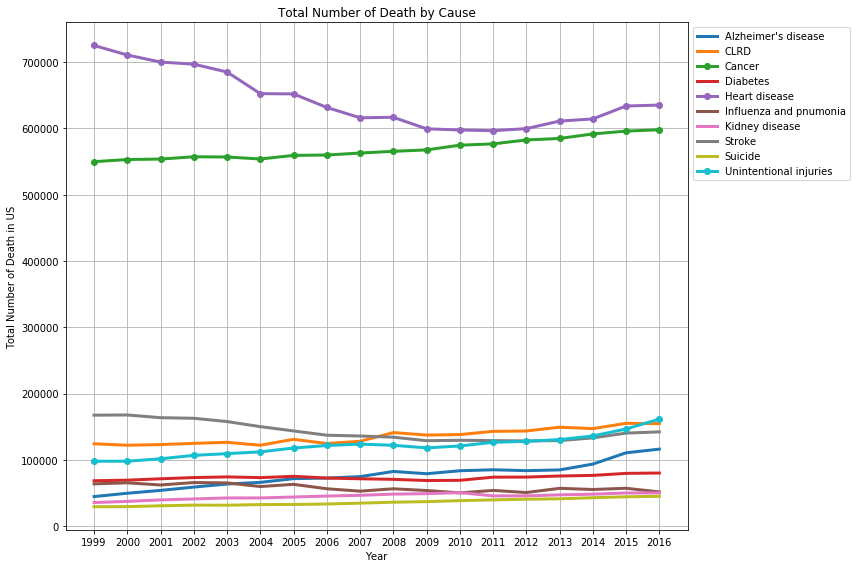

In [11]:
#Create plots of death counts by specific cause of death in the US over time
plt.figure(figsize=(12,8))
plt.plot(Deaths_Alzheimer["Year"],Deaths_Alzheimer["Deaths"],label="Alzheimer's disease",linewidth=3)
plt.plot(Deaths_CLRD["Year"],Deaths_CLRD["Deaths"],label="CLRD",linewidth=3)
plt.plot(Deaths_Cancer["Year"],Deaths_Cancer["Deaths"],label="Cancer",linewidth=3, marker="o")
plt.plot(Deaths_Diabetes["Year"],Deaths_Diabetes["Deaths"],label="Diabetes",linewidth=3)
plt.plot(Deaths_HD["Year"],Deaths_HD["Deaths"],label="Heart disease",linewidth=3, marker="o")
plt.plot(Deaths_IP["Year"],Deaths_IP["Deaths"],label="Influenza and pnumonia",linewidth=3)
plt.plot(Deaths_Kidney["Year"],Deaths_Kidney["Deaths"],label="Kidney disease",linewidth=3)
plt.plot(Deaths_Stroke["Year"],Deaths_Stroke["Deaths"],label="Stroke",linewidth=3)
plt.plot(Deaths_Suicide["Year"],Deaths_Suicide["Deaths"],label="Suicide",linewidth=3)
plt.plot(Deaths_UI["Year"],Deaths_UI["Deaths"],label="Unintentional injuries",linewidth=3, marker="o")

plt.legend(loc="upper right")
plt.xticks(Deaths_Alzheimer["Year"])
plt.legend(loc="upper left",bbox_to_anchor=(1,1))

plt.title("Total Number of Death by Cause")
plt.xlabel("Year")
plt.ylabel("Total Number of Death in US")
plt.grid()

plt.tight_layout()
plt.savefig("Q3_Image 1")
plt.show()

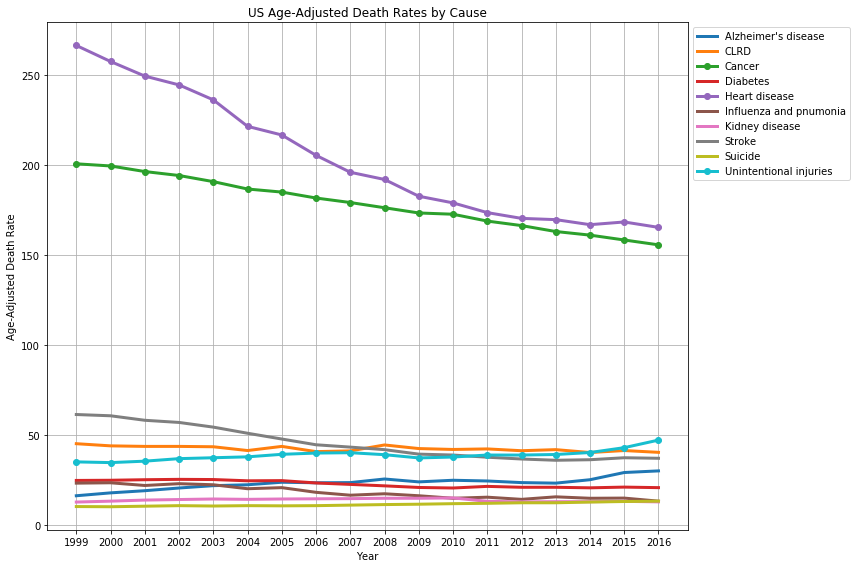

In [12]:
#Create plots of age-adjusted  counts by specific cause of death in the US over time
plt.figure(figsize=(12,8))
plt.plot(Deaths_Alzheimer["Year"],Deaths_Alzheimer["Age-adjusted Death Rate"],label="Alzheimer's disease",linewidth=3)
plt.plot(Deaths_CLRD["Year"],Deaths_CLRD["Age-adjusted Death Rate"],label="CLRD",linewidth=3)
plt.plot(Deaths_Cancer["Year"],Deaths_Cancer["Age-adjusted Death Rate"],label="Cancer",linewidth=3, marker="o")
plt.plot(Deaths_Diabetes["Year"],Deaths_Diabetes["Age-adjusted Death Rate"],label="Diabetes",linewidth=3)
plt.plot(Deaths_HD["Year"],Deaths_HD["Age-adjusted Death Rate"],label="Heart disease",linewidth=3, marker="o")
plt.plot(Deaths_IP["Year"],Deaths_IP["Age-adjusted Death Rate"],label="Influenza and pnumonia",linewidth=3)
plt.plot(Deaths_Kidney["Year"],Deaths_Kidney["Age-adjusted Death Rate"],label="Kidney disease",linewidth=3)
plt.plot(Deaths_Stroke["Year"],Deaths_Stroke["Age-adjusted Death Rate"],label="Stroke",linewidth=3)
plt.plot(Deaths_Suicide["Year"],Deaths_Suicide["Age-adjusted Death Rate"],label="Suicide",linewidth=3)
plt.plot(Deaths_UI["Year"],Deaths_UI["Age-adjusted Death Rate"],label="Unintentional injuries",linewidth=3, marker="o")

plt.legend(loc="upper right")
plt.xticks(Deaths_Alzheimer["Year"])
plt.legend(loc="upper left",bbox_to_anchor=(1,1))

plt.title("US Age-Adjusted Death Rates by Cause")
plt.xlabel("Year")
plt.ylabel("Age-Adjusted Death Rate")
plt.grid()

plt.tight_layout()
plt.savefig("Q3_Image 1")
plt.show()

## Create choropleth maps of US heart disease and cancer age-adjusted death rates

In [13]:
#restrict geolocation dataset to just the State and State abbreviations columns
US_State_Abbrev = US_States_GeoLocations[['State', 'State_Abbr']]

In [14]:
#remove rows for entire overall US numbers
# Death_Rates_Restricted = Death_Rate_Causes.loc[(Death_Rate_Causes['State'] != 'United States') | 
#                                            (Death_Rate_Causes['State'] != 'District of Columbia')]

Death_Rates_Restricted = Death_Rate_Causes.loc[
    Death_Rate_Causes['State'].isin(['United States', 'District of Columbia']) == False]

#merge Death Rates with State Abbreviation Dataset
Death_Rates_Restricted = pd.merge(Death_Rates_Restricted, US_State_Abbrev, on = 'State', how = 'left')

#restrict dataset to 2016 Diseases of Heart
HD_2016 = Death_Rates_Restricted[(Death_Rates_Restricted['Cause Name'] == 'Heart disease') & 
                      (Death_Rates_Restricted['Year'] == 2016)]

#restrict dataset to 2008 Diseases of Heart
HD_2008 = Death_Rates_Restricted[(Death_Rates_Restricted['Cause Name'] == 'Heart disease') & 
                      (Death_Rates_Restricted['Year'] == 2008)]

#restrict dataset to 2000 Diseases of Heart
HD_2000 = Death_Rates_Restricted[(Death_Rates_Restricted['Cause Name'] == 'Heart disease') & 
                      (Death_Rates_Restricted['Year'] == 2000)]

#restrict dataset to 2016 Cancer
Cancer_2016 = Death_Rates_Restricted[(Death_Rates_Restricted['Cause Name'] == 'Cancer') & 
                      (Death_Rates_Restricted['Year'] == 2016)]

#restrict dataset to 2008 Cancer
Cancer_2008 = Death_Rates_Restricted[(Death_Rates_Restricted['Cause Name'] == 'Cancer') & 
                      (Death_Rates_Restricted['Year'] == 2008)]

#restrict dataset to 2000 Cancer
Cancer_2000 = Death_Rates_Restricted[(Death_Rates_Restricted['Cause Name'] == 'Cancer') & 
                      (Death_Rates_Restricted['Year'] == 2000)]

In [15]:
#Color scheme for Heart Disease choropleth maps
HD_scl = [[0.0, 'rgb(255,244,244)'],[0.2, 'rgb(255,224,224)'],[0.4, 'rgb(255,186,186)'],\
            [0.6, 'rgb(255,130,130)'],[0.8, 'rgb(255,68,68)'],[1.0, 'rgb(255,0,0)']]

#Color scheme for Cancer choropleth maps
Cancer_scl = [[0.0, 'rgb(229, 219, 255)'],[0.2, 'rgb(200, 178, 255)'],[0.4, 'rgb(166, 130, 255)'],\
            [0.6, 'rgb(134, 84, 255)'],[0.8, 'rgb(111, 50, 255)'],[1.0, 'rgb(76, 0, 255)']]

In [16]:
######### List of plot inputs for Heart Disease #########
HD2016_data = [ dict(
        type='choropleth',
        colorscale = HD_scl,
        autocolorscale = False,
        locations = HD_2016['State_Abbr'],
        z = HD_2016['Age-adjusted Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = HD_2016['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Age-Adjusted Heart Disease Death Rates")
        ) ]

HD2008_data = [ dict(
        type='choropleth',
        colorscale = HD_scl,
        autocolorscale = False,
        locations = HD_2008['State_Abbr'],
        z = HD_2008['Age-adjusted Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = HD_2008['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Age-Adjusted Heart Disease Death Rates")
        ) ]

HD2000_data = [ dict(
        type='choropleth',
        colorscale = HD_scl,
        autocolorscale = False,
        locations = HD_2000['State_Abbr'],
        z = HD_2000['Age-adjusted Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = HD_2000['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Age-Adjusted Heart Disease Death Rates")
        ) ]

######### List of plot inputs for Cancer #########
Cancer2016_data = [ dict(
        type='choropleth',
        colorscale = Cancer_scl,
        autocolorscale = False,
        locations = Cancer_2016['State_Abbr'],
        z = Cancer_2016['Age-adjusted Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = Cancer_2016['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Age-Adjusted Cancer Death Rates")
        ) ]

Cancer2008_data = [ dict(
        type='choropleth',
        colorscale = Cancer_scl,
        autocolorscale = False,
        locations = Cancer_2008['State_Abbr'],
        z = Cancer_2008['Age-adjusted Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = Cancer_2008['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Age-Adjusted Cancer Death Rates")
        ) ]

Cancer2000_data = [ dict(
        type='choropleth',
        colorscale = Cancer_scl,
        autocolorscale = False,
        locations = Cancer_2000['State_Abbr'],
        z = Cancer_2000['Age-adjusted Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = Cancer_2000['State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Age-Adjusted Cancer Death Rates")
        ) ]

In [17]:
#Plot layout by year and cause of death for all maps
HD2016_layout = dict(
        title = 'US 2016 Age-Adjusted Heart Disease Death Rates (per 100,000 People) by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 0, 255)'),
             )

HD2008_layout = dict(
        title = 'US 2008 Age-Adjusted Heart Disease Death Rates (per 100,000 People) by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 0, 255)'),
             )

HD2000_layout = dict(
        title = 'US 2000 Age-Adjusted Heart Disease Death Rates (per 100,000 People) by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 0, 255)'),
             )

Cancer2016_layout = dict(
        title = 'US 2016 Age-Adjusted Cancer Death Rates (per 100,000 People) by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 0, 255)'),
             )

Cancer2008_layout = dict(
        title = 'US 2008 Age-Adjusted Cancer Death Rates (per 100,000 People) by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 0, 255)'),
             )

Cancer2000_layout = dict(
        title = 'US 2000 Age-Adjusted Cancer Death Rates (per 100,000 People) by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 0, 255)'),
             )

In [18]:
#2016 choropleth map of heart disease age-adjusted death rates
#link to map: https://plot.ly/create/?fid=eyangeric:2#/
HD2016_fig = dict( data=HD2016_data, layout=HD2016_layout )
plotly.plotly.iplot( HD2016_fig, filename='HD2016-cloropleth-map' )

In [19]:
#2008 choropleth map of heart disease age-adjusted death rates
#link to map: https://plot.ly/create/?fid=eyangeric:6#/
HD2008_fig = dict( data=HD2008_data, layout=HD2008_layout )
plotly.plotly.iplot( HD2008_fig, filename='HD2008-cloropleth-map' )

In [20]:
#2000 choropleth map of heart disease age-adjusted death rates
#link to map: https://plot.ly/create/?fid=eyangeric:8#/
HD2000_fig = dict( data=HD2000_data, layout=HD2000_layout )
plotly.plotly.iplot( HD2000_fig, filename='HD2000-cloropleth-map' )

In [21]:
#2016 choropleth map of cancer age-adjusted death rates
#link to map: https://plot.ly/create/?fid=eyangeric:4#/
Cancer2016_fig = dict( data=Cancer2016_data, layout=Cancer2016_layout )
plotly.plotly.iplot( Cancer2016_fig, filename='Cancer2016-cloropleth-map' )

In [22]:
#2008 choropleth map of cancer age-adjusted death rates
#link to map: https://plot.ly/create/?fid=eyangeric:10#/
Cancer2008_fig = dict( data=Cancer2008_data, layout=Cancer2008_layout )
plotly.plotly.iplot( Cancer2008_fig, filename='Cancer2008-cloropleth-map' )

In [23]:
#2000 choropleth map of cancer age-adjusted death rates
#link to map: https://plot.ly/create/?fid=eyangeric:12#/
Cancer2000_fig = dict( data=Cancer2000_data, layout=Cancer2000_layout )
plotly.plotly.iplot( Cancer2000_fig, filename='Cancer2000-cloropleth-map' )

## Plot US regional and division bar graphs

In [24]:
#prepare regional US data for bar graphs
regionbardf = regiondf[["Region", "Age-Adjusted Rate"]]
regionbardf = regionbardf.set_index("Region")

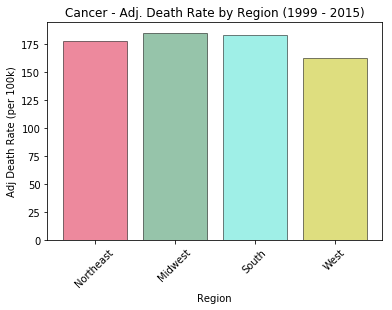

In [25]:
#US regional bar gaph of age-adjusted death rates
region_axis = np.arange(len(regionbardf))
regiontick_locations = [value for value in region_axis]
plt.bar(region_axis, regionbardf['Age-Adjusted Rate'], alpha = 0.5, align = 'center', edgecolor = 'black',
       color = ['crimson', 'seagreen', 'turquoise', 'y'])
plt.xticks(regiontick_locations, regiondf['Region'], rotation = 45)
plt.title("Cancer - Adj. Death Rate by Region (1999 - 2015)")
plt.xlabel("Region")
plt.ylabel("Adj Death Rate (per 100k)")
plt.savefig("regiondeathrate.png")

In [26]:
#prepare divisional US data for bar graphs
divisionbardf = divisiondf[["Division", "Age-Adjusted Rate"]]
divisionbardf = divisionbardf.set_index("Division")

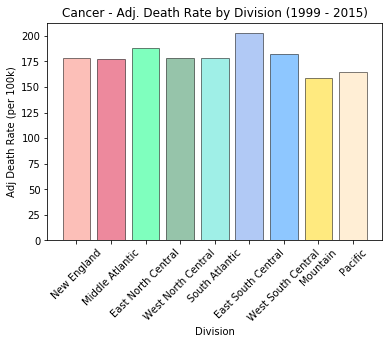

In [27]:
#US divional bar gaph of age-adjusted death rates
x_axis = np.arange(len(divisionbardf))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, divisionbardf['Age-Adjusted Rate'], alpha = 0.5, align = 'center', edgecolor = 'black',
       color = ['salmon', 'crimson', 'springgreen', 'seagreen', 'turquoise', 'cornflowerblue', 'dodgerblue',
                  'gold', 'navajowhite'])
plt.xticks(tick_locations, divisiondf['Division'], rotation = 45)
plt.title("Cancer - Adj. Death Rate by Division (1999 - 2015)")
plt.xlabel("Division")
plt.ylabel("Adj Death Rate (per 100k)")
plt.savefig("divisiondeathrate.png")